In [ ]:
#!pip install pystan
#!pip install prophet

In [ ]:
#!pip uninstall cmdstanpy
#!pip install cmdstanpy==0.9.5

In [1]:
import pandas as pd
import prophet as Prophet

ModuleNotFoundError: No module named 'prophet'

In [13]:
print('Prophet %s' % prophet.__version__)

Prophet 0.7.1


In [14]:
bc = pd.read_csv('/content/drive/MyDrive/Binance-BC-EDA.csv')
bc

,Date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,Return,Day of Week
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,NaN,Thu
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,-0.041238,Fri
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,0.007694,Sat
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,-0.012969,Sun
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,-0.017201,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,2021-12-27,50775.48,52088.00,50449.00,50701.44,28779.582120,2021-12-27 23:59:59.999000064,1.471424e+09,1009238,14432.910350,7.382075e+08,0.000000,-0.001458,Mon
1594,2021-12-28,50701.44,50704.05,47313.01,47543.74,45853.339240,2021-12-28 23:59:59.999000064,2.242102e+09,1345774,21743.170130,1.063172e+09,0.000000,-0.062280,Tue
1595,2021-12-29,47543.74,48139.08,46096.99,46464.66,39498.870000,2021-12-29 23:59:59.999000064,1.873786e+09,1114074,19089.619100,9.059697e+08,0.000000,-0.022697,Wed
1596,2021-12-30,46464.66,47900.00,45900.00,47120.87,30352.295690,2021-12-30 23:59:59.999000064,1.428756e+09,910157,14886.523750,7.007923e+08,0.000000,0.014123,Thu


Pre-Processing & Training Data Development

In [15]:
bc_prophet = bc[['Date','Close']]
#rename columns to work with Prophet
bc_prophet.columns = ['ds', 'y']

In [16]:
bc_prophet=bc_prophet.dropna()
train_X= bc_prophet[:1200]
test_X= bc_prophet[1200:]

In [17]:
prophet= Prophet()
prophet.fit(train_X)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


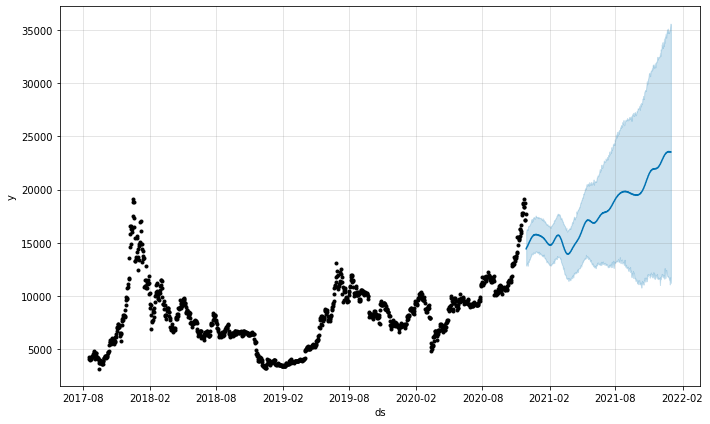

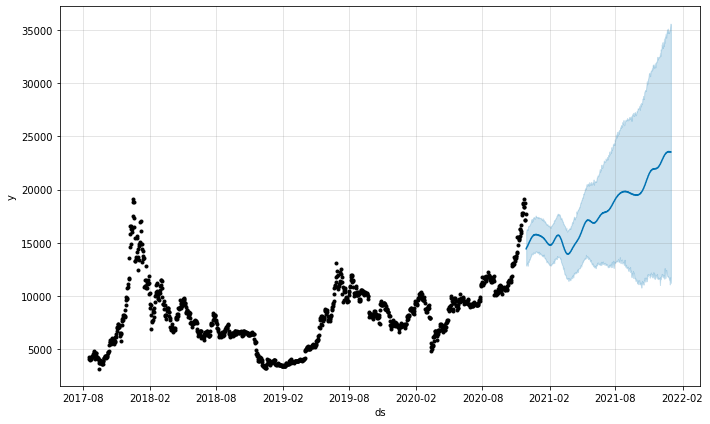

In [18]:
#Plot to get general view of the model
forecast_data = prophet.predict(test_X)
prophet.plot(forecast_data)

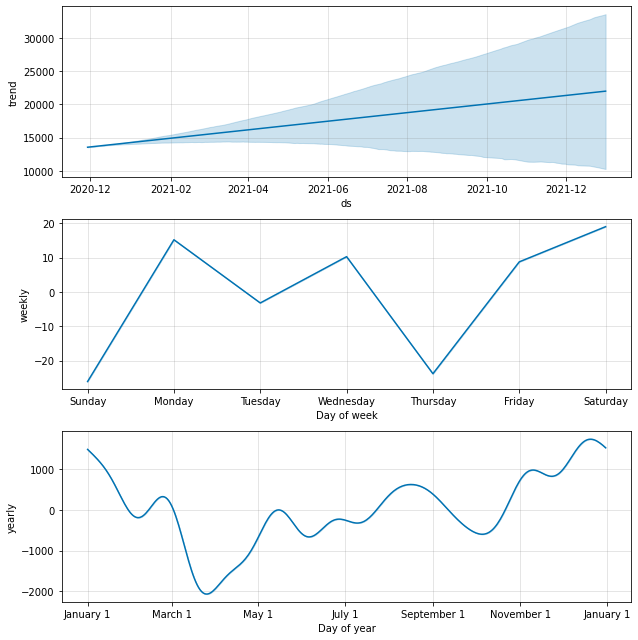

In [19]:
plt2 = prophet.plot_components(forecast_data)